<a href="https://colab.research.google.com/github/ae-98/coronavirus/blob/main/corona_virus_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse de donnée - Corona virus au maroc**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import datetime

Mounted at /content/drive


**Description de données (Statistique statistique descriptive)**

In [2]:
data = pd.read_excel("/content/drive/My Drive/corona_virus_maroc/Covid19-Mrocco.xlsx")
data = data.iloc[:216,0:6]
data["index"]=[x for x in range(1,len(data.values)+1)]
data = data.fillna(0)
data.describe()

,Cases found,Arrival,Local,death,Recovered,index
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000
mean,607.537037,0.819444,606.708333,10.615741,503.180556,108.500
std,772.631112,3.126748,773.234760,13.813224,709.916032,62.498
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000
25%,76.250000,0.000000,73.750000,1.000000,31.750000,54.750
50%,177.500000,0.000000,177.500000,3.000000,147.000000,108.500
75%,1155.750000,0.000000,1155.750000,19.000000,702.250000,162.250
max,2760.000000,20.000000,2760.000000,44.000000,3426.000000,216.000


**nombre de décés par jour**

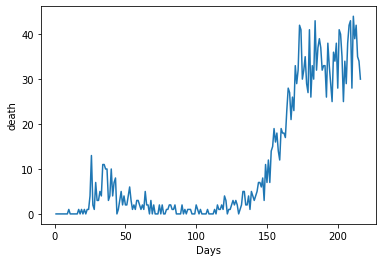

In [3]:
plt.plot(data["index"],data["death"])
plt.xlabel("Days")
plt.ylabel("death")
plt.show()

**nombre de guérisons par jour**


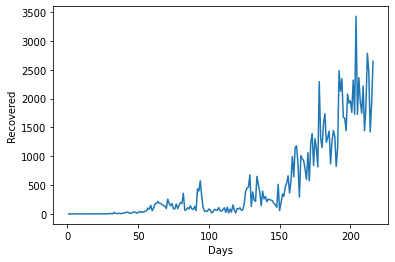

In [4]:
plt.plot(data["index"],data["Recovered"])
plt.xlabel("Days")
plt.ylabel("Recovered")
plt.show()

**cas de contaminations par jour**

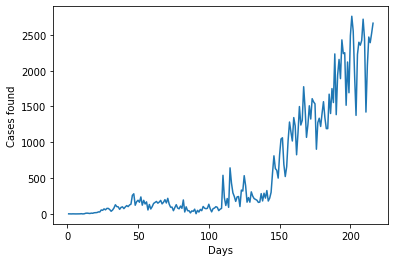

In [5]:
plt.plot(data["index"],data["Cases found"])
plt.xlabel("Days")
plt.ylabel("Cases found")
plt.show()

**pourcentage de guérisons, décés et cas encours de traitement**

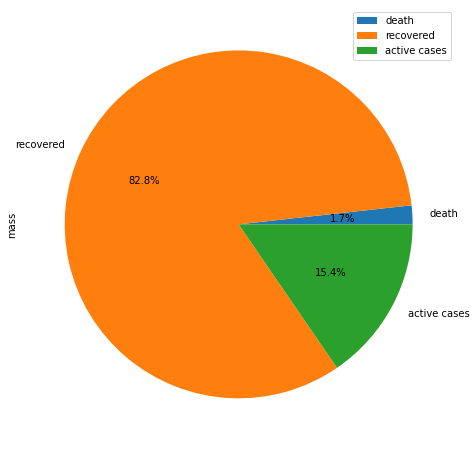

In [6]:
active_cases = data['Cases found'].sum()-data['death'].sum()-data['Recovered'].sum()
a = [data['death'].sum(),data['Recovered'].sum(),active_cases]
df = pd.DataFrame({'mass': a},index=['death', 'recovered', 'active cases'])
plot = df.plot.pie(y='mass', figsize=(15, 8),autopct='%1.1f%%')

# ***les charts cumltatives***

In [7]:
datacum = data.iloc[:,1:6].cumsum()
datacum["index"]=[x for x in range(1,len(datacum.values)+1)]

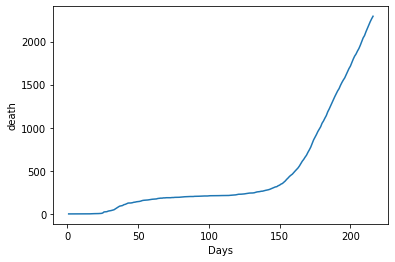

In [8]:
plt.plot(datacum["index"],datacum["death"])
plt.xlabel("Days")
plt.ylabel("death")
plt.show()

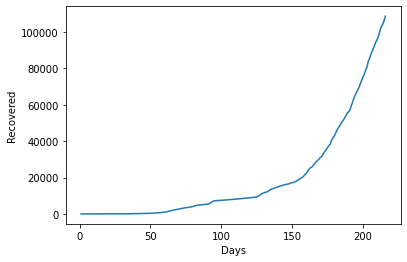

In [9]:
plt.plot(datacum["index"],datacum["Recovered"])
plt.xlabel("Days")
plt.ylabel("Recovered")
plt.show()

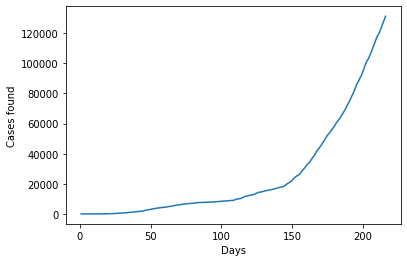

In [10]:
plt.plot(datacum["index"],datacum["Cases found"])
plt.xlabel("Days")
plt.ylabel("Cases found")
plt.show()

# ***Regression polynomiale (Prediction de nouveaux cas)***

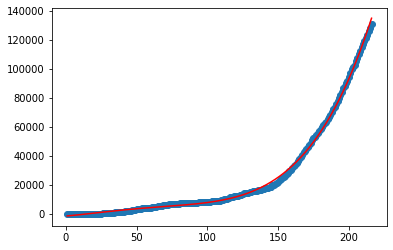

In [11]:
x = np.array(datacum['index']).reshape(-1,1)
target = np.array(datacum['Cases found']).reshape(-1,1)
 
Input=[('polynomial',PolynomialFeatures(degree=4)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),target.reshape(-1,1))
poly_pred=pipe.predict(x.reshape(-1,1))
plt.scatter(x,target)
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
plt.plot(x_poly,poly_pred,color='red',label='Polynomial Regression')
plt.show()

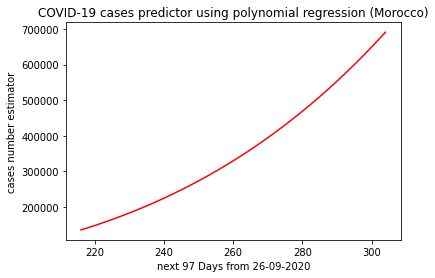

In [12]:
commingDays = np.array([x for x in range(216,305)])
estimateCases = pipe.predict(commingDays.reshape(-1,1))
estimateCases = estimateCases.astype(int)
 
plt.plot(commingDays,estimateCases,color='red')
plt.title('COVID-19 cases predictor using polynomial regression (Morocco)')
plt.xlabel('next 97 Days from 26-09-2020')
plt.ylabel('cases number estimator')
plt.show()

In [13]:
dates=[]
date = datetime.datetime(2020,10,3)
for i in range(89): 
    date += datetime.timedelta(days=1)
    dates.append(date.strftime("%d/%m/%Y"))
 
predictionCases = pd.DataFrame()
predictionCases["next days"]= dates
predictionCases["Prediction Cases"] = estimateCases
 
predictionCases.to_excel('/content/drive/My Drive/corona_virus_maroc/prediction_cases.xlsx',sheet_name="prediction_cases")
 
predictionCases

,next days,Prediction Cases
0,04/10/2020,135132
1,05/10/2020,138174
2,06/10/2020,141271
3,07/10/2020,144422
4,08/10/2020,147629
...,...,...
84,27/12/2020,649346
85,28/12/2020,659578
86,29/12/2020,669933
87,30/12/2020,680410
